In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("food_access_research_atlas.csv" )

In [3]:
data.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [4]:
data.describe()

,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.286400e+04,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,...,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000
mean,2.783045e+10,0.757191,4237.285052,1601.837560,0.007082,109.619606,0.026961,0.126880,0.282115,0.111235,...,552.645806,3068.089386,534.273702,201.392347,7.411246,40.242754,385.875618,692.764520,145.356239,207.022206
std,1.581256e+10,0.428783,1972.520112,732.106217,0.083855,442.922669,0.095494,0.332841,0.450032,0.314425,...,352.988078,1804.353298,887.806852,435.085612,45.084789,181.024758,528.776237,1117.876349,230.201932,187.188807
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,1.000000,2883.750000,1102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,318.000000,1832.000000,42.000000,17.000000,0.000000,7.000000,83.000000,87.000000,37.000000,69.000000
50%,2.712979e+10,1.000000,4002.000000,1521.000000,0.000000,7.000000,0.001779,0.000000,0.000000,0.000000,...,495.000000,2903.000000,158.000000,57.000000,1.000000,15.000000,184.000000,240.000000,84.000000,158.000000
75%,4.103900e+10,1.000000,5323.000000,2018.000000,0.000000,63.000000,0.015516,0.000000,1.000000,0.000000,...,716.000000,4111.000000,606.000000,188.000000,5.000000,33.000000,446.000000,746.000000,172.000000,293.000000
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,1.000000,1.000000,1.000000,1.000000,...,17271.000000,28983.000000,16804.000000,10485.000000,3491.000000,9009.000000,8839.000000,15420.000000,6176.000000,2152.000000


# Question 1 
* Do Chi-square 3+ test of independence between state, LILATracts_1And10 

In [5]:
county = pd.DataFrame(data["County"].value_counts())

In [6]:
county.count()

County    1837
dtype: int64

In [7]:
data.groupby("County")["Urban"].value_counts()

County     Urban
0          0        7
Abbeville  0        5
           1        1
Acadia     0        6
           1        6
                   ..
Zapata     1        2
           0        1
Zavala     0        3
           1        1
Ziebach    0        1
Name: Urban, Length: 3187, dtype: int64

In [8]:
states = pd.DataFrame(data["State"].value_counts())

In [9]:
states.count()

State    51
dtype: int64

In [10]:
data[data["County"] == "0"]

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
1265,2105000300,Alaska,0,0,2055,872,0,0,0.000000,1,...,275,1006,8,11,1,814,215,75,239,168
1326,2195000200,Alaska,0,0,3815,1599,0,43,0.011271,0,...,438,2711,15,100,7,614,368,130,157,128
1327,2198000100,Alaska,0,0,1685,729,0,37,0.021958,1,...,181,1217,5,6,7,351,99,29,159,203
1328,2198000200,Alaska,0,0,2327,908,0,13,0.005587,0,...,227,1358,6,13,3,645,302,70,125,170
1329,2198000300,Alaska,0,0,87,48,0,0,0.000000,1,...,18,79,0,0,1,1,6,2,7,0
1330,2198940100,Alaska,0,0,1460,509,0,0,0.000000,0,...,133,145,6,2,10,1210,87,26,70,177
1340,2275000300,Alaska,0,0,2369,1053,0,19,0.008020,1,...,374,1719,4,33,1,384,228,37,136,171


In [11]:
pd.DataFrame(data["State"].value_counts())

,State
California,8044
Texas,5258
New York,4907
Florida,4214
Pennsylvania,3218
Illinois,3121
Ohio,2949
Michigan,2774
North Carolina,2192
New Jersey,2007


In [12]:
data[data["State"] == "District of Columbia" ] 

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
13901,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24,0.004908,0,...,885,4444,105,201,2,9,129,296,634,0
13902,11001000201,District of Columbia,District of Columbia,1,3916,2,1,3908,0.997957,0,...,41,2940,259,482,5,7,223,275,0,0
13903,11001000202,District of Columbia,District of Columbia,1,5425,1933,0,1135,0.209217,0,...,536,4705,159,375,3,5,178,343,332,0
13904,11001000300,District of Columbia,District of Columbia,1,6233,2754,0,0,0.000000,0,...,461,5497,139,352,1,11,233,404,408,23
13905,11001000400,District of Columbia,District of Columbia,1,1455,636,0,6,0.004124,0,...,278,1247,50,103,0,2,53,123,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14075,11001010700,District of Columbia,District of Columbia,1,1838,1244,0,192,0.104461,0,...,119,1442,89,209,0,6,92,137,730,0
14076,11001010800,District of Columbia,District of Columbia,1,6408,1034,1,5079,0.792603,0,...,65,5146,279,708,3,2,270,268,655,21
14077,11001010900,District of Columbia,District of Columbia,1,3211,1161,0,447,0.139209,0,...,147,58,3055,15,0,6,77,47,589,476
14078,11001011000,District of Columbia,District of Columbia,1,3715,2345,0,84,0.022611,0,...,803,1632,1712,140,3,29,199,183,568,74


## Question 1.2

In [13]:
data["LILATracts_1And10"]

0        0
1        0
2        0
3        0
4        0
        ..
72859    0
72860    0
72861    0
72862    0
72863    0
Name: LILATracts_1And10, Length: 72864, dtype: int64

# Question 2

In [14]:
data["Urban"].value_counts()

1    55172
0    17692
Name: Urban, dtype: int64

75 % of the tracts are urban

In [15]:
55172 / (55172 + 17692)

0.757191480017567

In [16]:
data.groupby("Urban")["LILATracts_1And10"].value_counts()

Urban  LILATracts_1And10
0      0                    16352
       1                     1340
1      0                    47267
       1                     7905
Name: LILATracts_1And10, dtype: int64

### Urban
Out of the 75% urban tracts, 14% are food deserts

In [17]:
(7905/(47267+7905))*100

14.327919959399695

### Rural
Out of the 25% Rural tracts, 7% are food deserts

In [18]:
(1340/(1340+16352))*100

7.57404476599593

In [19]:
data.nunique()

CensusTract      72864
State               51
County            1837
Urban                2
POP2010           9123
                 ...  
TractAIAN          972
TractOMultir      2979
TractHispanic     5256
TractHUNV         1601
TractSNAP         1200
Length: 147, dtype: int64

CensusTract      72864
State               51
County            1837

In [20]:
data[data["State"] == "Alaska"]

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
1179,2013000100,Alaska,Aleutians East,0,3141,553,0,1726,0.549507,1,...,155,660,219,1130,19,876,237,385,124,84
1180,2016000100,Alaska,Aleutians West,0,1185,285,0,444,0.374684,1,...,75,289,32,178,7,589,90,60,88,31
1181,2016000200,Alaska,Aleutians West,0,4376,927,0,2099,0.479662,0,...,118,1715,300,1428,96,268,569,666,88,47
1182,2020000101,Alaska,Anchorage,1,5736,1946,0,139,0.024233,0,...,300,4951,57,73,4,295,356,209,21,65
1183,2020000102,Alaska,Anchorage,0,5259,2010,0,16,0.003042,0,...,479,4391,48,121,12,286,401,201,73,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,2282000100,Alaska,Yakutat,0,662,270,0,18,0.027190,0,...,64,281,2,27,12,237,103,17,26,26
1342,2290000100,Alaska,Yukon-Koyukuk,0,1311,558,0,2,0.001526,1,...,117,185,3,2,3,1076,42,13,340,222
1343,2290000200,Alaska,Yukon-Koyukuk,0,1461,595,0,28,0.019165,1,...,172,640,5,4,0,713,99,27,130,134
1344,2290000300,Alaska,Yukon-Koyukuk,0,1758,658,0,0,0.000000,1,...,183,198,2,6,0,1495,57,14,330,208


In [21]:
data.describe()

,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.286400e+04,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,...,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000,72864.000000
mean,2.783045e+10,0.757191,4237.285052,1601.837560,0.007082,109.619606,0.026961,0.126880,0.282115,0.111235,...,552.645806,3068.089386,534.273702,201.392347,7.411246,40.242754,385.875618,692.764520,145.356239,207.022206
std,1.581256e+10,0.428783,1972.520112,732.106217,0.083855,442.922669,0.095494,0.332841,0.450032,0.314425,...,352.988078,1804.353298,887.806852,435.085612,45.084789,181.024758,528.776237,1117.876349,230.201932,187.188807
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,1.000000,2883.750000,1102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,318.000000,1832.000000,42.000000,17.000000,0.000000,7.000000,83.000000,87.000000,37.000000,69.000000
50%,2.712979e+10,1.000000,4002.000000,1521.000000,0.000000,7.000000,0.001779,0.000000,0.000000,0.000000,...,495.000000,2903.000000,158.000000,57.000000,1.000000,15.000000,184.000000,240.000000,84.000000,158.000000
75%,4.103900e+10,1.000000,5323.000000,2018.000000,0.000000,63.000000,0.015516,0.000000,1.000000,0.000000,...,716.000000,4111.000000,606.000000,188.000000,5.000000,33.000000,446.000000,746.000000,172.000000,293.000000
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,1.000000,1.000000,1.000000,1.000000,...,17271.000000,28983.000000,16804.000000,10485.000000,3491.000000,9009.000000,8839.000000,15420.000000,6176.000000,2152.000000


# Question 3

* Do chi-square (GOF) between GroupQuartersFlag and LILATracts_1And10

In [22]:
data.groupby("GroupQuartersFlag")["LILATracts_1And10"].value_counts()

GroupQuartersFlag  LILATracts_1And10
0                  0                    63215
                   1                     9133
1                  0                      404
                   1                      112
Name: LILATracts_1And10, dtype: int64

In [23]:
# group quarters with food deserts

In [24]:
112/(404 + 112)

0.21705426356589147

In [25]:
# # group quarters without food deserts

In [26]:
9133/(63215 +9133)

0.12623707635318185

In [27]:
# percentage of group quarters

In [28]:
data["GroupQuartersFlag"].value_counts()

0    72348
1      516
Name: GroupQuartersFlag, dtype: int64

In [29]:
(516/(516 + 72348) ) * 100

0.7081686429512516

The number of food deserts are high for urban group quarters tract

In [30]:
data[(data["GroupQuartersFlag"] ==1) & (data["LILATracts_1And10"]==1)]["Urban"].value_counts()

1    107
0      5
Name: Urban, dtype: int64

In [31]:
107/112


0.9553571428571429

In [32]:
47038 + 16289

63327

In [33]:
# Ratio of group quarters in urban and rurla areas

In [34]:
data.groupby("Urban")["GroupQuartersFlag"].value_counts()

Urban  GroupQuartersFlag
0      0                    17619
       1                       73
1      0                    54729
       1                      443
Name: GroupQuartersFlag, dtype: int64

#### Rural
Percentage of rural people in group quarters

In [35]:
73/(17619 +73)

0.0041261587158037535

#### Urban
Percentage of urban people in group quarters

In [36]:
443/(443 + 54729)

0.008029435220764155

### Poverty rate in group quarters

In [37]:
# Poverty rate in group quarters
# poverty rate is high in gq

In [38]:
data.groupby("GroupQuartersFlag")["PovertyRate"].mean()

GroupQuartersFlag
0    16.473564
1    29.659302
Name: PovertyRate, dtype: float64

In [39]:

29.659302/16.473564

1.8004180516128752

In [40]:
data.groupby("GroupQuartersFlag")["LowIncomeTracts"].value_counts()

GroupQuartersFlag  LowIncomeTracts
0                  0                  41750
                   1                  30598
1                  1                    272
                   0                    244
Name: LowIncomeTracts, dtype: int64

In [41]:
# Ratio of low income in group quarters

In [42]:
272/(272 + 244)

0.5271317829457365

In [43]:
# Ratio of low income in non- group quarters

In [44]:
30598/ (30598 + 41750)

0.42292806988444737

# Question 4

In [45]:
# Low access is not correlated with low income

In [46]:
data[data["LA1and10"] == 0]["LowIncomeTracts"].value_counts()

0    23712
1    21625
Name: LowIncomeTracts, dtype: int64

In [47]:
# Low access people are rich, rich people wants to stay outside. we need to multivariate with urban, ethnicity.

In [48]:
data[data["LA1and10"] == 1]["LowIncomeTracts"].value_counts()

0    18282
1     9245
Name: LowIncomeTracts, dtype: int64

In [49]:
value_counts = data[data["LA1and10"] == 1]["LowIncomeTracts"].value_counts()

In [50]:
value_counts

0    18282
1     9245
Name: LowIncomeTracts, dtype: int64

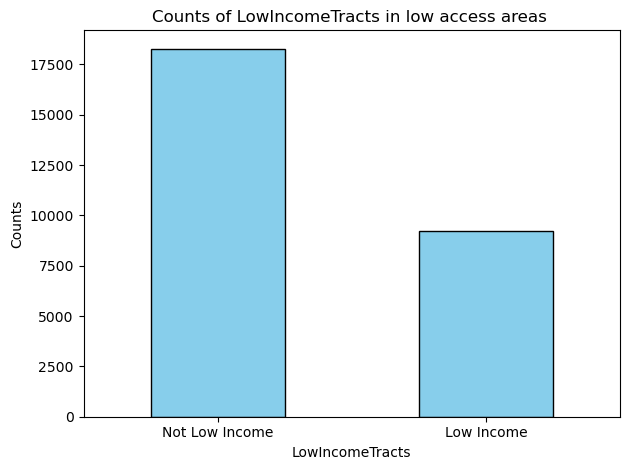

In [51]:
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Counts of LowIncomeTracts in low access areas ")
plt.xlabel("LowIncomeTracts")
plt.ylabel("Counts")
plt.xticks(rotation=0)

# Setting custom x-axis labels
labels = ["Not Low Income" if value == 0 else "Low Income" if value == 1 else value for value in value_counts.index]
plt.xticks(ticks=range(len(value_counts.index)), labels=labels)

plt.tight_layout()
plt.show()

In [52]:
18282/(9245 + 18282)

0.6641479274893741

In [53]:
data.groupby("LA1and10")["PovertyRate"].mean()

LA1and10
0    17.976803
1    14.244898
Name: PovertyRate, dtype: float64

In [54]:
data.groupby("LA1and20")["PovertyRate"].mean()

LA1and20
0    17.849840
1    14.066872
Name: PovertyRate, dtype: float64

In [55]:
data[data["LA1and10"] == 1]["Urban"].value_counts()

1    24322
0     3205
Name: Urban, dtype: int64

In [56]:
data[data["LowIncomeTracts"] == 0]["Urban"].value_counts()

1    30228
0    11766
Name: Urban, dtype: int64

In [57]:
# rich and urban

In [58]:
30228/ (11766 + 30228) 

0.7198171167309616

In [59]:
# rich and rural

In [60]:
1 - 0.7198171167309616


0.2801828832690384

In [61]:
# poor and urban ?

In [62]:
24944/(5926 + 24944)

0.8080336896663427

In [63]:
data[(data["LILATracts_1And10"] == 1 )&(data["LowIncomeTracts"] == 1 )].count()

CensusTract      9245
State            9245
County           9245
Urban            9245
POP2010          9245
                 ... 
TractAIAN        9245
TractOMultir     9245
TractHispanic    9245
TractHUNV        9245
TractSNAP        9245
Length: 147, dtype: int64

In [64]:
data.groupby("LILATracts_1And10")["LILATracts_1And10"].sum()

LILATracts_1And10
0       0
1    9245
Name: LILATracts_1And10, dtype: int64

## Question 4.1

In [65]:
## Poverty rate is high in food deserted areas

In [66]:
data.groupby("LILATracts_1And10")["PovertyRate"].mean()

LILATracts_1And10
0    15.125722
1    26.484619
Name: PovertyRate, dtype: float64

In [67]:
26.484619/(15.125722)

1.7509656067988026

In [68]:
data.groupby("LILATracts_1And20")["PovertyRate"].mean()

LILATracts_1And20
0    15.248630
1    27.100259
Name: PovertyRate, dtype: float64

In [69]:
data.groupby("LowIncomeTracts")["PovertyRate"].mean()

LowIncomeTracts
0     8.634436
1    27.357924
Name: PovertyRate, dtype: float64

In [70]:
## Poverty rate is high in non low access areas

In [71]:
data.groupby("LA1and10")["PovertyRate"].mean()

LA1and10
0    17.976803
1    14.244898
Name: PovertyRate, dtype: float64

In [72]:
17.976803/14.244898

1.261981868876843

In [73]:
data.groupby("LA1and20")["PovertyRate"].mean()

LA1and20
0    17.849840
1    14.066872
Name: PovertyRate, dtype: float64

In [74]:
#data.groupby("State").sort_values(by="PovertyRate",ascending=False)

In [75]:
data['PovertyRate'].quantile(0.75) 

22.7

In [76]:
states_pov = pd.DataFrame(data.groupby("State").mean("PovertyRate")["PovertyRate"])

In [77]:
states_pov.head()

,PovertyRate
State,
Alabama,21.222053
Alaska,11.231737
Arizona,18.488663
Arkansas,20.350146
California,16.523695


### Normalising the povertyrate count 
This is done before picking the high poverty states to have it normalised based on the overall data

In [78]:
scaler = MinMaxScaler()

states_pov_nm = pd.DataFrame(scaler.fit_transform(states_pov), columns=["PovertyRate"], index=states_pov.index)

In [79]:
states_pov_nm

,PovertyRate
State,
Alabama,0.773809
Alaska,0.112711
Arizona,0.592930
Arkansas,0.716112
California,0.462901
Colorado,0.263934
Connecticut,0.145297
Delaware,0.207535
District of Columbia,0.674124


In [80]:
states_high_pov =pd.DataFrame(states_pov_nm[ (states_pov_nm["PovertyRate"] > states_pov_nm['PovertyRate'].quantile(0.85))])

In [81]:
states_high_pov

,PovertyRate
State,
Alabama,0.773809
Arkansas,0.716112
District of Columbia,0.674124
Georgia,0.726746
Kentucky,0.700390
Louisiana,0.801888
Mississippi,1.000000
New Mexico,0.743427


## The statewise food desert count

In [82]:
states_food_deserts = pd.DataFrame(data[data["LILATracts_1And10"] ==1]["State"].value_counts())

In [83]:
states_food_deserts.head()

,State
Texas,1041
Florida,582
California,542
Ohio,447
Georgia,444


### Normalising the food desert count 
This is done before picking only the high poverty states to have it normalised based on the overall data

In [84]:
scaler = MinMaxScaler()

states_food_deserts_nm = pd.DataFrame(scaler.fit_transform(states_food_deserts), columns=["food_desert_rate"], index=states_food_deserts.index)

In [85]:
states_food_deserts_nm.head()

,food_desert_rate
Texas,1.000000
Florida,0.556522
California,0.517874
Ohio,0.426087
Georgia,0.423188


#### Picking only the high poverty states from the food deserts

In [86]:
states_high_pov.count()

PovertyRate    8
dtype: int64

In [87]:
states_food_deserts_nm = states_food_deserts_nm.loc[states_high_pov.index]

In [88]:
states_food_deserts_nm

,food_desert_rate
State,
Alabama,0.231884
Arkansas,0.165217
District of Columbia,0.000000
Georgia,0.423188
Kentucky,0.120773
Louisiana,0.235749
Mississippi,0.194203
New Mexico,0.124638


In [89]:
states_high_pov

,PovertyRate
State,
Alabama,0.773809
Arkansas,0.716112
District of Columbia,0.674124
Georgia,0.726746
Kentucky,0.700390
Louisiana,0.801888
Mississippi,1.000000
New Mexico,0.743427


### There is no correlation between poverty rates and food desert status
The states with high poverty don't have high number of food deserts

In [90]:
states_high_pov["PovertyRate"].corr(states_food_deserts_nm["food_desert_rate"])

0.21222172433329037

#### Checking correlation of poverty rate and food desert status of all the states 

In [91]:
scaler = MinMaxScaler()
states_food_deserts_nm = pd.DataFrame(scaler.fit_transform(states_food_deserts), columns=["food_desert_rate"], index=states_food_deserts.index)

#### There is very less correlation between povery rate and food deserts in all states

In [92]:
states_pov_nm["PovertyRate"].corr(states_food_deserts_nm["food_desert_rate"])

0.4098760019748423

In [93]:
data[data["LILATracts_1And10"] ==1]

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
6,1001020700,Alabama,Autauga,1,2891,1188,0,36,0.012452,1,...,360,2333,435,13,3,11,96,98,134,218
11,1001021100,Alabama,Autauga,0,3320,1306,0,33,0.009940,1,...,493,1441,1810,2,0,14,53,39,196,262
17,1003010600,Alabama,Baldwin,1,3325,1186,0,14,0.004210,1,...,305,1323,1851,3,0,30,118,92,156,311
37,1003011407,Alabama,Baldwin,1,4799,2161,0,4,0.000834,1,...,1040,4525,56,36,1,26,155,57,64,143
40,1003011502,Alabama,Baldwin,1,10534,4330,0,0,0.000000,1,...,1882,7818,1693,113,8,74,828,1314,245,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72791,56021001100,Wyoming,Laramie,1,3072,794,0,503,0.163737,1,...,3,2431,233,72,10,21,305,347,6,4
72797,56021001502,Wyoming,Laramie,1,4899,2149,0,11,0.002245,1,...,684,4281,130,44,5,30,409,668,166,355
72806,56025000200,Wyoming,Natrona,1,4385,2050,0,187,0.042645,1,...,528,3631,128,36,1,90,499,753,339,482
72828,56029965400,Wyoming,Park,1,5769,2543,0,66,0.011440,1,...,975,5494,9,20,7,46,193,202,38,133


In [94]:
data["State"].value_counts()

California              8044
Texas                   5258
New York                4907
Florida                 4214
Pennsylvania            3218
Illinois                3121
Ohio                    2949
Michigan                2774
North Carolina          2192
New Jersey              2007
Georgia                 1965
Virginia                1900
Arizona                 1526
Indiana                 1508
Tennessee               1497
Massachusetts           1476
Washington              1455
Maryland                1399
Wisconsin               1395
Missouri                1393
Minnesota               1336
Colorado                1249
Alabama                 1179
Louisiana               1143
Kentucky                1115
South Carolina          1103
Oklahoma                1046
Connecticut              832
Oregon                   830
Iowa                     825
Kansas                   770
Nevada                   687
Arkansas                 686
Mississippi              662
Utah          

## Countywise poverty and food desert relationship

In [95]:
county_pov = pd.DataFrame(data.groupby("County").mean("PovertyRate")["PovertyRate"])

In [96]:
county_pov.head()

,PovertyRate
County,
0,17.471429
Abbeville,22.250000
Acadia,19.758333
Accomack,24.090909
Ada,14.003390


### Normalising the povertyrate count 
This is done before picking the high poverty states to have it normalised based on the overall data

In [97]:
scaler = MinMaxScaler()

county_pov_nm = pd.DataFrame(scaler.fit_transform(county_pov), columns=["PovertyRate"], index= county_pov.index)

In [98]:
county_pov_nm

,PovertyRate
County,
0,0.374121
Abbeville,0.476445
Acadia,0.423091
Accomack,0.515865
Ada,0.299858
...,...
Yukon-Koyukuk,0.516060
Yuma,0.399902
Zapata,0.766595


In [99]:
county_high_pov =pd.DataFrame(county_pov_nm[ ( county_pov_nm["PovertyRate"] > county_pov_nm['PovertyRate'].quantile(0.85))])

In [100]:
county_high_pov

,PovertyRate
County,
Accomack,0.515865
Adair,0.511680
Alachua,0.591198
Alamosa,0.532655
Alexander,0.534164
...,...
Yuba,0.512848
Yukon-Koyukuk,0.516060
Zapata,0.766595


### The County wise food desert count

In [101]:
county_food_deserts = pd.DataFrame(data.groupby("County")["LILATracts_1And10"].sum())

In [102]:
county_food_deserts.head()

,LILATracts_1And10
County,
0,4
Abbeville,1
Acadia,4
Accomack,1
Ada,2


#### Normalising the food desert count 
This is done before picking only the high poverty states to have it normalised based on the overall data

In [103]:
scaler = MinMaxScaler()

county_food_deserts_nm = pd.DataFrame(scaler.fit_transform(county_food_deserts), columns=["food_desert_rate"], index=county_food_deserts.index)

In [104]:
county_food_deserts_nm.head()

,food_desert_rate
County,
0,0.031008
Abbeville,0.007752
Acadia,0.031008
Accomack,0.007752
Ada,0.015504


#### Picking only the high poverty counties from the food deserts

In [105]:
county_high_pov.count()

PovertyRate    276
dtype: int64

In [106]:
county_food_deserts_nm = county_food_deserts_nm.loc[county_high_pov.index]

In [107]:
county_food_deserts_nm

,food_desert_rate
County,
Accomack,0.007752
Adair,0.023256
Alachua,0.085271
Alamosa,0.023256
Alexander,0.023256
...,...
Yuba,0.031008
Yukon-Koyukuk,0.031008
Zapata,0.023256


In [108]:
county_high_pov

,PovertyRate
County,
Accomack,0.515865
Adair,0.511680
Alachua,0.591198
Alamosa,0.532655
Alexander,0.534164
...,...
Yuba,0.512848
Yukon-Koyukuk,0.516060
Zapata,0.766595


### There is no correlation between poverty rates and food desert status even in countywise
The counties with high poverty don't have high number of food deserts

In [109]:
county_high_pov["PovertyRate"].corr(county_food_deserts_nm["food_desert_rate"])

-0.011332335327506245

#### Checking correlation of poverty rate and food desert status of all the counties 

In [110]:
scaler = MinMaxScaler()
county_food_deserts_nm = pd.DataFrame(scaler.fit_transform(county_food_deserts), columns=["food_desert_rate"], index=county_food_deserts.index)

#### There is very less correlation between povery rate and food deserts in all counties

In [111]:
county_pov_nm["PovertyRate"].corr(county_food_deserts_nm["food_desert_rate"])

0.08831953472995763

# Question 5 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

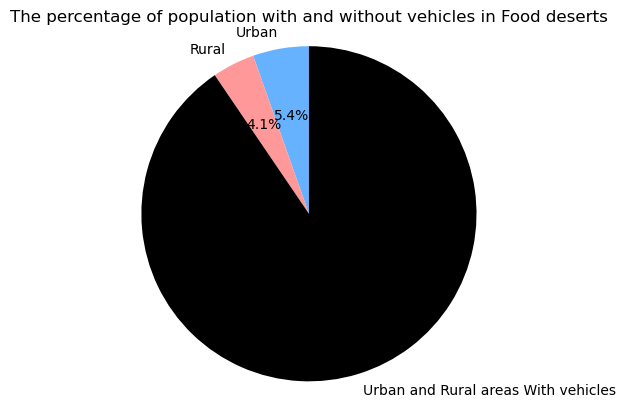

In [74]:


# Data
percentages = [5.4, 4.1,90.5]
labels = ['Urban', 'Rural','Urban and Rural areas With vehicles']
colors = ['#66b2ff', '#ff9999', 'black']

# Create Pie Chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie is circular.

plt.title("The percentage of population with and without vehicles in Food deserts")
plt.show()


Results :
* By using LILATRACT_Vehicle we found that food desert people has less vehicle access and by using "lahunv1share" we found that percentage of people who doesn't have a vehicle is high for food deserts.


Task : 
* Is there a significant difference in the prevalence of food deserts in areas with and without vehicle access issues?
* The percentage of people who doesn't have a car for 10 miles in rural and 1 mile in urban for each state
* Percentage of people who doesn't have a car in food desert both for urban and rural
* Is the percentage low for urban areas? 

In [120]:
data[( data["LILATracts_1And10"] ==1 ) & ( data["Urban"] == 1)]["lahunv1share"]

6        0.062176
17       0.047213
37       0.018309
40       0.022857
51       0.007469
           ...   
72790    0.083430
72791    0.009733
72797    0.029439
72806    0.155294
72828    0.004485
Name: lahunv1share, Length: 7905, dtype: float64

##### As expected the percentage of people who doesn't have a car is high for food deserts both in urban and rural areas

In [ ]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==1 ) & ( data["Urban"] == 1)]["lahunv1share"]), x ="lahunv1share", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()


In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==0 ) & ( data["Urban"] == 1)]["lahunv1share"]), x ="lahunv1share", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==1 ) & ( data["Urban"] == 0)]["lahunv10share"]), x ="lahunv10share", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==0 ) & ( data["Urban"] == 0)]["lahunv10share"]), x ="lahunv10share", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==1 )]["lahunv10share"]), x ="lahunv10share", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

### The percentage of people who doesn't have a car for 10 miles in rural and 1 mile in urban for each state

#### Is there a significant difference in the prevalence of food deserts in areas with and without vehicle access issues?

Yes from the below analysis we find that food deserts are higher in areas without vehicles

* The percentage of people who doesn't have a car in a food desert is higher than a non-food desert for urban population

In [119]:
data[( data["Urban"] == 1)].groupby("LILATracts_1And10")["lahunv1share"].mean()

LILATracts_1And10
0    0.007168
1    0.054564
Name: lahunv1share, dtype: float64

In [118]:
pd.DataFrame(data[( data["Urban"] == 1)].groupby("LILATracts_1And10")["lahunv1share"])

,0,1
0,0,0 0.014102 1 0.029123 2 0...
1,1,6 0.062176 17 0.047213 37 0...


* The percentage of people who doesn't have a car in a food desert is higher than a non-food desert for rural population

In [117]:
data[( data["Urban"] == 0)].groupby("LILATracts_1And10")["lahunv10share"].mean()

LILATracts_1And10
0    0.002321
1    0.040797
Name: lahunv10share, dtype: float64

* The percentage of people who doesn't have a car in both urban and rural is higher in food deserts compared to non-food deserts

In [116]:
data.groupby("LILATracts_1And10")["lahunv1share"].mean()

LILATracts_1And10
0    0.013859
1    0.056335
Name: lahunv1share, dtype: float64

* After 10 miles also the percentage of people The percentage of people who doesn't have a car is high in food deserts compared to non-food deserts

In [115]:
data.groupby("LILATracts_1And10")["lahunv10share"].mean()

LILATracts_1And10
0    0.000607
1    0.006052
Name: lahunv10share, dtype: float64

* Genreally the Rural population don't have vehicles compared to urban population.

In [113]:
data.groupby("Urban")["lahunv1share"].mean()

Urban
0    0.035745
1    0.013959
Name: lahunv1share, dtype: float64

In [114]:
data.groupby("Urban")["lahunv10share"].mean()

Urban
0    0.005235
1    0.000036
Name: lahunv10share, dtype: float64

### Percentage of people who doesn't have a car in food desert both for urban and rural
#### Is the percentage low for urban areas?
* Comparing the lahunv1share for urban "0.054564" and lahunv10share for rural "0.040797", the percentage of population who doesn't have vehicles is slightly more in urban food deserts 

In [112]:
data[( data["LILATracts_1And10"] ==1 )].groupby("Urban")["lahunv1share","lahunv10share"].mean()

/var/folders/6m/0w40n7p11jd2c0112ngdmyx40000gn/T/ipykernel_25998/2534779081.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[( data["LILATracts_1And10"] ==1 )].groupby("Urban")["lahunv1share","lahunv10share"].mean()


,lahunv1share,lahunv10share
Urban,,
0,0.066786,0.040797
1,0.054564,0.000162


In [ ]:
data

# Question 6 
 * How do income-related variables (MedianFamilyIncome, LowIncomeTracts) relate to food deserts? *
 * What is the median family income in food desert areas compared to non-food desert areas? 
 * What percentage of low-income tracts are classified as food deserts ?
 * Create anova for this and poverty rate
 * Medianfamilyincome - confidence interval
 * Do anova between medianfamilyincome in Urban, rural, total and food desert, and then do posthoc if null is rejected


In [ ]:
pd.DataFrame(data[( data["LILATracts_1And10"] ==1 ) & ( data["Urban"] == 0)]["MedianFamilyIncome"])

### Median Income in food deserts
Look how the graph is skewed.
The urban population is skewing the data with high median family income, compared to the rural population

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==1 )]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==1 ) & ( data["Urban"] == 0)]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==1 ) & ( data["Urban"] == 1)]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

### Median Income in non-food deserts
 * In non-food desert areas the rural population is more richer than the urban population.

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==0 ) & ( data["Urban"] == 1)]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[( data["LILATracts_1And10"] ==0 ) & ( data["Urban"] == 0)]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

#### Medianfamily income Between urban and rual

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[ data["Urban"] == 1]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[ data["Urban"] == 0]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

#### Medianfamily income Between food desert and non-food desert
* Non-food desert areas is more richer than food-desert tracts

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[ data["LILATracts_1And10"] == 0]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

In [ ]:
# Create a histogram
sns.histplot(data=pd.DataFrame(data[ data["LILATracts_1And10"] == 1]["MedianFamilyIncome"]), x ="MedianFamilyIncome", bins=50, kde=True)  # 'kde' adds a Kernel Density Estimate plot
#"Percentage of urban population who does not have vehicles in food desert"
# Show the plot
plt.show()

### What percentage of low-income tracts are classified as food deserts ?

In [ ]:
data[(data["LILATracts_1And10"] == 1 )&(data["LowIncomeTracts"] == 1 )].sum()

In [ ]:
(data[(data["LILATracts_1And10"] == 1 )&(data["LowIncomeTracts"] == 1 )]["LILATracts_1And10"].count())/(data[data["LowIncomeTracts"]==1]["LowIncomeTracts"].count())

In [ ]:
# Plotting
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie chart for Two Variables")
plt.show()

# Question 7a
more work needed

In [ ]:
data["LILATracts_1And10"].value_counts()

In [ ]:
9245/(9245 + 63619)

In [ ]:
data["LILATracts_1And20"].value_counts()

In [ ]:
8105/(8105 +64759 )

In [ ]:
data["LILATracts_1And20"].value_counts()

In [ ]:
data["LILATracts_halfAnd10"].value_counts()

In [ ]:
20556/(20556+52308)

In [ ]:
data[(data["LILATracts_1And10"] ==1) & (data)

# question 8 :

*  Are there specific areas with a high prevalence of food deserts that require targeted interventions?
    - highest state and highest count of food desert
    
* What factors are strongly associated with the presence of food deserts and can be addressed to alleviate the issue? 
    - snap and food desert
    - vehicle and food desert


Question 9 :
**Relevant**:
 **How do food deserts impact different demographic groups (e.g., racial and ethnic populations, age groups)?**
- Are there disparities in food desert prevalence among different racial or ethnic groups?
- How does the presence of food deserts affect children (TractKids) and seniors (TractSeniors) in the population?
* calcualte 1share and urban = 1 likewise do 10share =1 and urban =0
* results from keerthana: 
    - white population is more in food desert both in urban and rural

# Misc 

In [ ]:
data[(data["LA1and10"]==1) & (data["Urban"]== 1)]["lapop1share"]

In [ ]:
data[(data["LA1and10"]==1) & (data["Urban"]== 1) & (data["lapop1share"] < 0.33)]["lapop1share"]

* find flag for tract where there is less no of supermarkets within 1 miles of access. 
* is LILATracts_1And10 a flag for food desert considering the super market or the accessibility of the tract?
* According to the USDA website LILATracts_1And10 is the flag.
* Low-income and low-access tract measured at 1 mile and 10 miles
Definition: A low-income tract with at least 500 people, or 33 percent of the population, living more than 1 mile (urban areas) or more than 10 miles (rural areas) from the nearest supermarket, supercenter, or large grocery store.

* No vehicle, low access, share of housing units at 1 mile
 **Definition**: Percentage of housing units more than 1 mile from the nearest supermarket, supercenter, or large grocery store without access to a vehicle.
* No vehicle, low access, share of housing units at 10 miles
Definition: Percentage of housing units located more than 10 miles from the nearest supermarket, supercenter, or large grocery store without access to a vehicle. I think this is the variable "lahunv10share"
* Out of the 33% population living outside 1 mile in urban, the above variable will tell us how many didn't have vehicles.
 * lahunv1share - this will tell us Percentage of housing units more than 1 mile from the nearest supermarket, supercenter, or large grocery store without access to a vehicle. But we need to use with filter urban = 1 to calculate only the urban share

* OHU2010 - Occupied housing unit count from 2010 census
* TractHUNV - Total count of housing units without a vehicle in tract 
* If we divide TractHUNV by OHU2010, we should get the share of housing units without vehicles but it does not give us "lahunv10share" as  OHU2010 and TractHUNV don't consider the 1 or 10 miles within supermarket